# SKLearn 05 | Simple Linear Regression dengan Scikit-Learn | Belajar Machine Learning Dasar

Link youtube : https://www.youtube.com/watch?v=lcjq7-2zMSA

## Sample dataset

In [1]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
        'harga': [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


## Visualisasi Data

<function matplotlib.pyplot.show(close=None, block=None)>

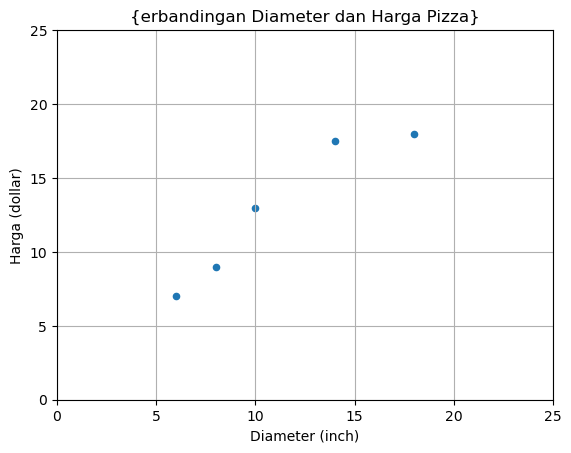

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('{erbandingan Diameter dan Harga Pizza}')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

## Penyesuaian Dataset

In [3]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'x: {y}')

x: [ 6  8 10 14 18]
x: [ 7.   9.  13.  17.5 18. ]


In [4]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [5]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

## Training Simple Linear Regression Model 

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

## Visualiasi Simple Linear Regression Model

In [7]:
x_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(x_vis)

<function matplotlib.pyplot.show(close=None, block=None)>

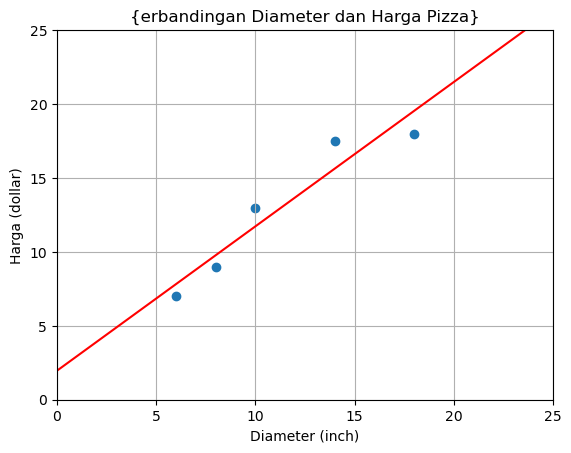

In [8]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('{erbandingan Diameter dan Harga Pizza}')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show

Formula Linear Regression: y = a + bx

y : response variable
x : explanotry variable
a : intercent
b : slope

In [9]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


## Mencari Nilai Slope

In [10]:
print(f'x:\n(x)\n')
print(f'x flatten: {x.flatten()}\n')
print(f'x:{y}')

x:
(x)

x flatten: [ 6  8 10 14 18]

x:[ 7.   9.  13.  17.5 18. ]


## Variance

In [11]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


## Covariance

In [12]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [13]:
covariance_xy = np.cov(x.flatten(),y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


## Slope

In [16]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


## Mencari nilai intercept 

In [18]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


## Prediksi Harga Pizza 

In [19]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [20]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [22]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga: {hrg}')

diameter: [12] prediksi harga: 13.681034482758621
diameter: [20] prediksi harga: 21.491379310344826
diameter: [23] prediksi harga: 24.42025862068965


## Evaluasi Simple Linear Regression Model 

Training & Testing Dataset

In [23]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

x_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

Training Simple Linear Regression Model

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R^2)

In [26]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


## Mencari nilai R-squared (R^2)

In [28]:
ss_res = sum((y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
             for x_i, y_i in zip(x_test, y_test))

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


SStot

In [31]:
mean_y = np.mean(y_test)
ss_tot = sum((y_i - mean_y)**2 for y_i in y_test)

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


R^2

In [34]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
